In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, LeakyReLU, Input
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD, Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras import backend as Backend
Backend.tensorflow_backend._get_available_gpus()
import tensorflow as k
config = k.ConfigProto()
config.gpu_options.allow_growth = True
import warnings
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [5]:
IMG_CHANNELS = 3
IMG_ROWS = X_train[0].shape[0]
IMG_COLS = X_train[0].shape[1]

BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = len(np.unique(y_train))

In [6]:
X_train[0].shape[1]

32

In [7]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
datagen.fit(X_train)

In [11]:
def baseModel():
    model_in = Input((IMG_ROWS,IMG_COLS,IMG_CHANNELS))
    model = Conv2D(32,(3,3),padding='same')(model_in)
    model = LeakyReLU(0.15)(model)
    model = Conv2D(32,(3,3),padding='same')(model)
    model = LeakyReLU(0.15)(model)
    model = MaxPooling2D(pool_size=(2,2))(model)
    model = Dropout(0.25)(model)
    
    model = Conv2D(64,(3,3),padding='same')(model_in)
    model = LeakyReLU(0.15)(model)
    model = Conv2D(64,(3,3),padding='same')(model)
    model = LeakyReLU(0.15)(model)
    model = MaxPooling2D(pool_size=(2,2))(model)
    model = Dropout(0.25)(model)
    
    model = Flatten()(model)
    model = Dense(512)(model)
    model = LeakyReLU(0.15)(model)
    model = Dropout(0.5)(model)
    model = Dense(NB_CLASSES)(model)
    model = Activation('softmax')(model)
    model = Model(model_in,model)
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    return model

In [12]:
model = baseModel()

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
__________

In [14]:
history = model.fit_generator(generator=(datagen.flow(X_train,y_train,batch_size=BATCH_SIZE)),epochs=50,validation_data=(X_test, y_test),verbose=1)

Epoch 1/50
391/391 [==============================] - 31s 80ms/step - loss: 1.8743 - acc: 0.3359 - val_loss: 1.4821 - val_acc: 0.4729
Epoch 2/50
391/391 [==============================] - 30s 76ms/step - loss: 1.5874 - acc: 0.4314 - val_loss: 1.3212 - val_acc: 0.5301
Epoch 3/50
391/391 [==============================] - 30s 77ms/step - loss: 1.5115 - acc: 0.4627 - val_loss: 1.2650 - val_acc: 0.5516
Epoch 4/50
391/391 [==============================] - 30s 76ms/step - loss: 1.4561 - acc: 0.4828 - val_loss: 1.2783 - val_acc: 0.5388
Epoch 5/50
391/391 [==============================] - 30s 76ms/step - loss: 1.4238 - acc: 0.4949 - val_loss: 1.2400 - val_acc: 0.5671
Epoch 6/50
391/391 [==============================] - 30s 76ms/step - loss: 1.4092 - acc: 0.5031 - val_loss: 1.2727 - val_acc: 0.5693
Epoch 7/50
391/391 [==============================] - 30s 76ms/step - loss: 1.3781 - acc: 0.5131 - val_loss: 1.4209 - val_acc: 0.5384
Epoch 8/50
391/391 [==============================] - 30s 77ms

In [15]:
score = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE, verbose=1)
score

10000/10000 [==============================] - 1s 110us/step


[1.0374384759902955, 0.669]

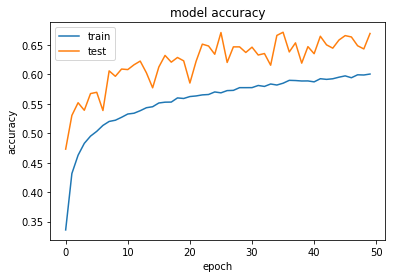

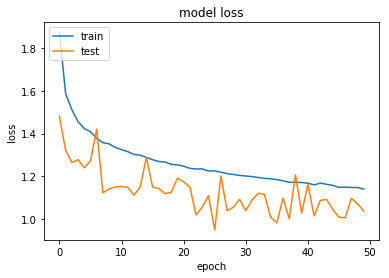

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
def saveModel(model):
    model_json = model.to_json()
    open('cifar10_architecture.json', 'w').write(model_json)
    model.save_weights('cifar10_weights.h5', overwrite=True)

In [18]:
saveModel(model)

In [19]:
def loadModel():
    model_architecture = 'cifar10_architecture.json'
    model_weights = 'cifar10_weights.h5'
    model = model_from_json(open(model_architecture).read())
    model.load_weights(model_weights)
    return model